<a href="https://colab.research.google.com/github/busrasari/INF506-DataAnalysisMethods/blob/main/UE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
from collections import Counter
import random
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

def normal_cdf(x, mu=0,sigma=1):
   return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2


# method 1


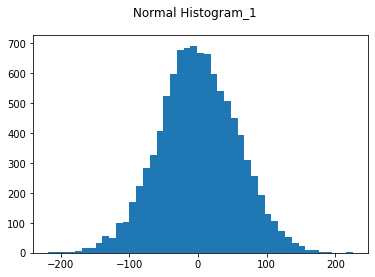

In [ ]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
   """find approximate inverse using binary search"""
   # if not standard, compute standard and rescale
   if mu != 0 or sigma != 1:
       return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
   low_z, low_p = -10.0, 0  # normal_cdf(-10) is (very close to) 0
   hi_z, hi_p = 10.0, 1  # normal_cdf(10) is (very close to) 1
   while hi_z - low_z > tolerance:
       mid_z = (low_z + hi_z) / 2  # consider the midpoint
       mid_p = normal_cdf(mid_z)  # and the cdf's value there
       if mid_p < p:
           # midpoint is still too low, search above it
           low_z, low_p = mid_z, mid_p
       elif mid_p > p:
           # midpoint is still too high, search below it
           hi_z, hi_p = mid_z, mid_p
       else:
           break
   return mid_z

random.seed(3)
ps = [random.random() for _ in range(10000)]
normal = [inverse_normal_cdf(ps[i], mu=0, sigma=57, tolerance=0.00001) for i in range(10000)]   

plt.hist(normal, bins = 45)
plt.suptitle("Normal Histogram_1")
plt.show()


## method 2

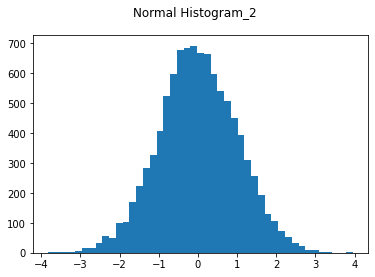

In [ ]:
normal2 = [norm.ppf(ps[i]) for i in range(10000)]

plt.hist(normal2, bins = 45)
plt.suptitle("Normal Histogram_2")
plt.show()
